## Falsificações por ano e por estado das cédulas do Brasil

Diariamente o departamento do meio circulante no Banco Central do Brasil identifica cédulas falsas em suas análises.

<br>**Ano:** ano de apreensão da cédula falsa;
<br>**Estado:** nome do estado da federação;
<br>**Família:** Agrupamento da espécie (cédulas, moedas e peças comuns e comemorativas) e característica da espécie;
<br>**Falsificações:** Falsificações das cédulas.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Leitura de dados

In [3]:
dados = pd.read_csv("https://github.com/Weslley95/data-science/raw/master/data/cedulas_falsificadas.csv", dayfirst=True)

**Tipos de dados**

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            5891 non-null   int64 
 1   estado         5891 non-null   object
 2   familia        5891 non-null   object
 3   nota           5891 non-null   int64 
 4   falsificacoes  5891 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 230.2+ KB


In [35]:
dados.dtypes

ano               int64
estado           object
familia          object
nota              int64
falsificacoes     int64
dtype: object

**Quantidade de linhas e colunas**

In [36]:
dados.shape

(5891, 5)

**Descrição da coluna falsificações**

In [37]:
dados['ano'].describe()

count    5891.000000
mean     2011.972840
std         6.729123
min      1995.000000
25%      2006.000000
50%      2013.000000
75%      2018.000000
max      2022.000000
Name: ano, dtype: float64

**Descrição da coluna familia**

In [38]:
dados['familia'].describe()

count                   5891
unique                     3
top       cedulas 1a familia
freq                    3813
Name: familia, dtype: object

**Descrição da coluna estado**

In [39]:
dados['estado'].describe()

count          5891
unique           28
top       sao paulo
freq            253
Name: estado, dtype: object

**Descrição da coluna falsificações**

In [40]:
dados['falsificacoes'].describe()

count      5891.000000
mean       1829.952979
std        7062.098767
min           1.000000
25%          17.000000
50%         134.000000
75%         906.500000
max      188792.000000
Name: falsificacoes, dtype: float64

## Manipulação e limpeza de dados

**Verificar se existe valores nulos**

In [41]:
dados.isnull().any()

ano              False
estado           False
familia          False
nota             False
falsificacoes    False
dtype: bool

**Ordernação dos dados**

In [42]:
dados.sort_values(["ano", "estado", "nota"])

,ano,estado,familia,nota,falsificacoes
0,1995,parana,cedulas 1a familia,50,237
1,1995,rio de janeiro,cedulas 1a familia,50,3
2,1995,rio de janeiro,cedulas 1a familia,100,1
3,1995,sao paulo,cedulas 1a familia,100,1
4,1996,distrito federal,cedulas 1a familia,50,1
...,...,...,...,...,...
5886,2022,tocantins,cedulas 2a familia,20,8
5887,2022,tocantins,cedulas 1a familia,50,1
5888,2022,tocantins,cedulas 2a familia,50,7
5889,2022,tocantins,cedulas 2a familia,100,3


**Maior numero de falsificações de 1995 até 2022**

In [43]:
print('Menor número de falsificações:', min(dados.falsificacoes))
print('Maior número de falsificações:', max(dados.falsificacoes))
print('Total de falsificações de 1995 até 2022:', sum(dados.falsificacoes))
print('Total de falsificações de 1995 até 2022:', sum(dados.falsificacoes))

Menor número de falsificações: 1
Maior número de falsificações: 188792
Total de falsificações de 1995 até 2022: 10780253
Total de falsificações de 1995 até 2022: 10780253


## Descritivo e exploração de dados

**Media de falsificações por cédulas**

In [44]:
dados[["nota","familia", "falsificacoes"]].groupby(["nota", "familia"]).mean()

falsificacoes
nota familia                           
1    cedulas 1a familia       12.909574
2    cedulas 1a familia       59.354839
     cedulas 2a familia       34.532258
5    cedulas 1a familia      581.324238
     cedulas 2a familia      165.326360
10   cedulas 1a familia     2231.714286
     cedulas 2a familia      303.046429
     cedulas em polimero     397.512397
20   cedulas 1a familia     1445.937500
     cedulas 2a familia     1732.857143
50   cedulas 1a familia     5845.294461
     cedulas 2a familia     1709.660436
100  cedulas 1a familia     1639.345865
     cedulas 2a familia     5123.385093
200  cedulas 2a familia     1000.328767

**Estados com média de falsificações**

In [45]:
media_falsificacoes_estado = dados[["estado", "falsificacoes"]].groupby(["estado"]).mean().sort_values(by=["falsificacoes"], ascending=False)

media_falsificacoes_estado

,falsificacoes
estado,
sao paulo,14897.007905
rio de janeiro,4731.750000
minas gerais,4368.692308
parana,2932.615385
rio grande do sul,2776.470833
bahia,1997.927660
goias,1905.175966
santa catarina,1736.566524
pernambuco,1418.700000


## Figuras que mostrem insights

In [46]:
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-paper')
import seaborn.apionly as sns
from collections import Counter

**Média de falsificações por ano**

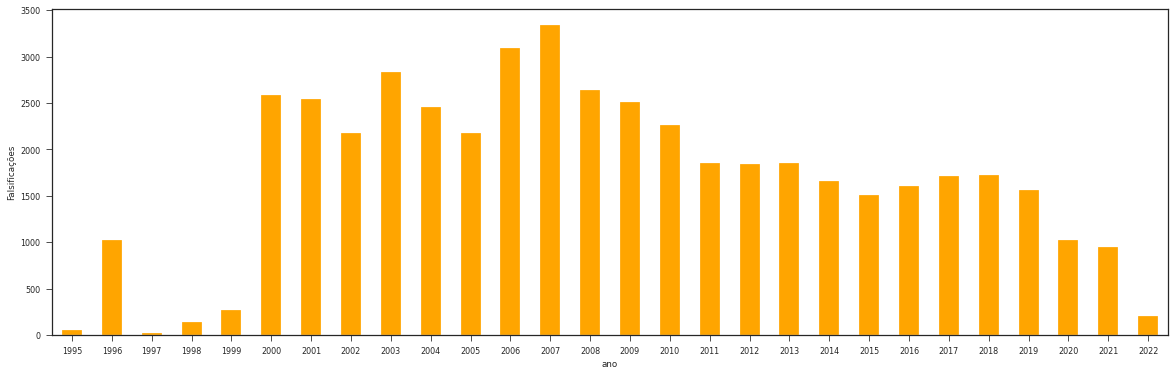

In [47]:
dados.groupby('ano')['falsificacoes'].mean().plot(kind='bar', color= 'orange', figsize=(20, 6))
dados.groupby('familia')['falsificacoes'].mean().plot(kind='hist', density=True)
plt.ylabel('Falsificações')

plt.show();

**Média de falsificações por estado**

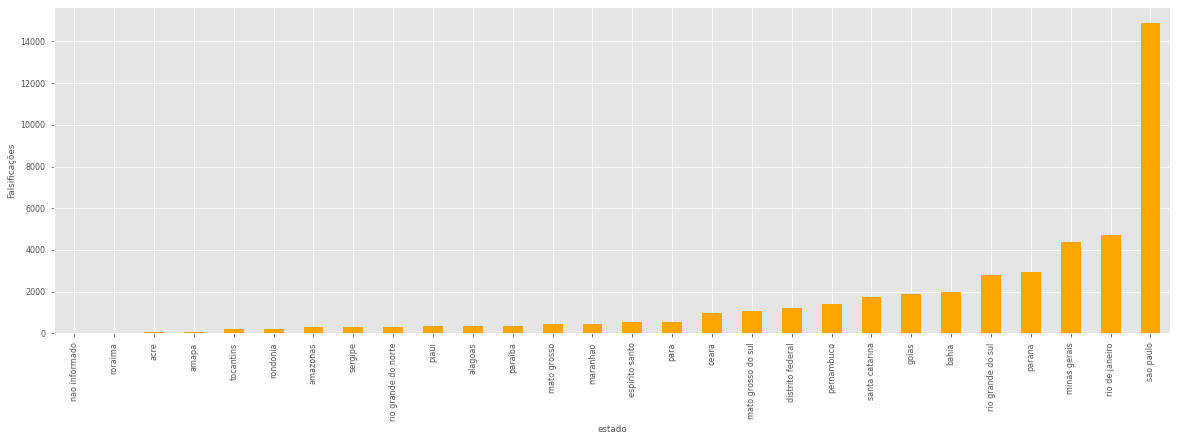

In [ ]:
dados.groupby('estado')['falsificacoes'].mean().sort_values().plot(kind='bar', color= 'orange', figsize=(20, 6))
plt.ylabel('Falsificações')

plt.show();

**Média de falsificações por família das cédulas**

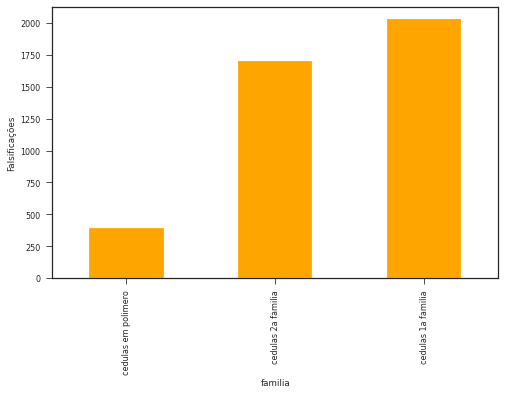

In [48]:
dados.groupby('familia')['falsificacoes'].mean().sort_values().plot(kind='bar', color= 'orange', figsize=(8, 5))
plt.ylabel('Falsificações')

plt.show();

**Média de falsificações por cédulas**

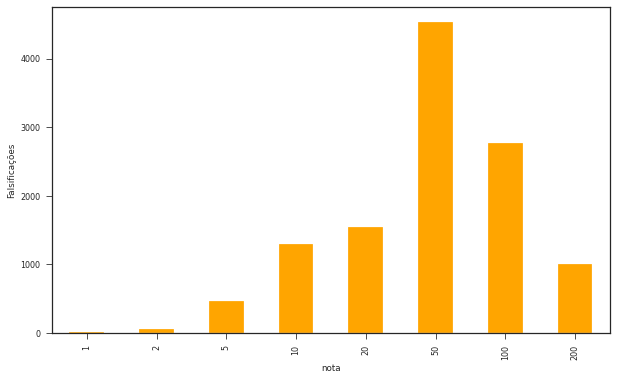

In [49]:
dados.groupby('nota')['falsificacoes'].mean().plot(kind='bar', color= 'orange', figsize=(10, 6))
plt.ylabel('Falsificações')

plt.show();

**Porcentagem dos tipos de cédulas**

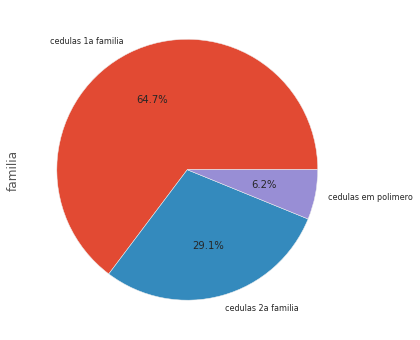

In [54]:
plt.style.use("ggplot")

dados['familia'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(6, 6))
plt.show()

**Porcentagem de falsificações por estados**

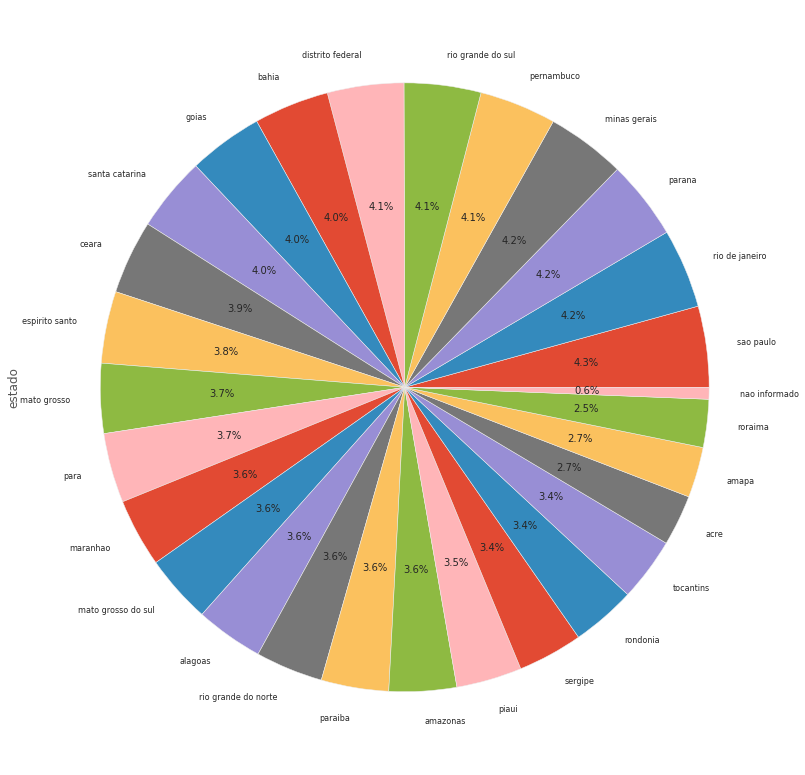

In [61]:
plt.style.use("ggplot")

dados['estado'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(14, 14))
plt.show()

**Ocorrências de falsificações por estado**

In [64]:
estado = Counter(dados['estado'])

tipo = sorted(estado, key = estado.get, reverse = True)

contador_tipo = sorted(list(estado.values()), reverse = True)

**Gráfico**

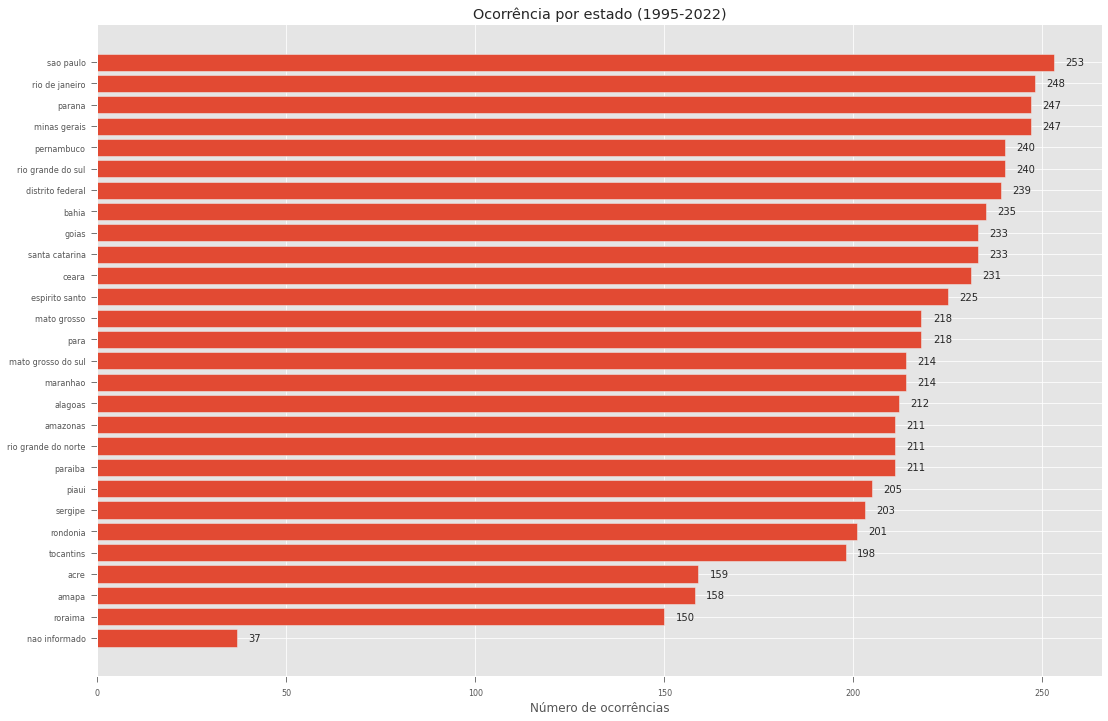

In [65]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(18, 12))

x=tipo
y=contador_tipo

rects1=ax.barh(x, y)

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel("Número de ocorrências")
plt.title('Ocorrência por estado (1995-2022)')

plt.show()

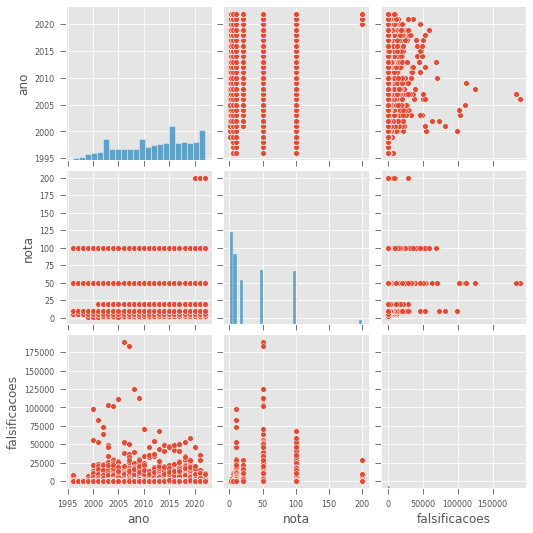

In [77]:
sns.pairplot(dados.loc[10:,'ano':'falsificacoes'])
plt.show()

**Matriz de correlação**

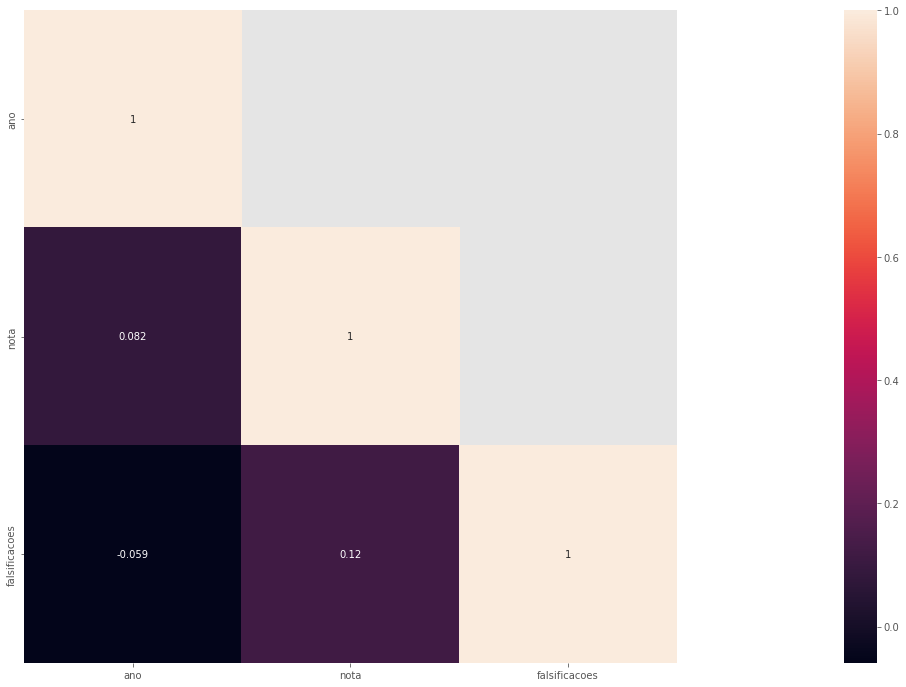

In [ ]:
cor_mat = dados.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(60,12)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

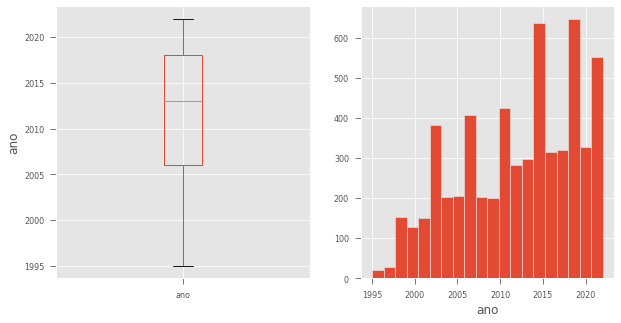

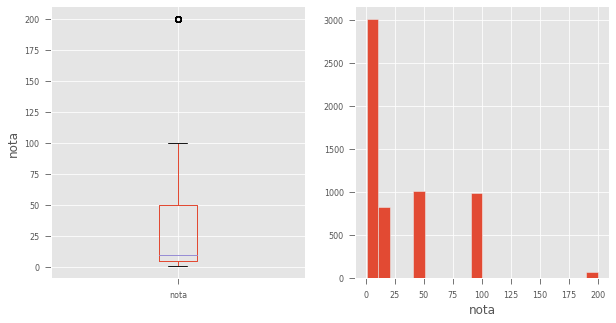

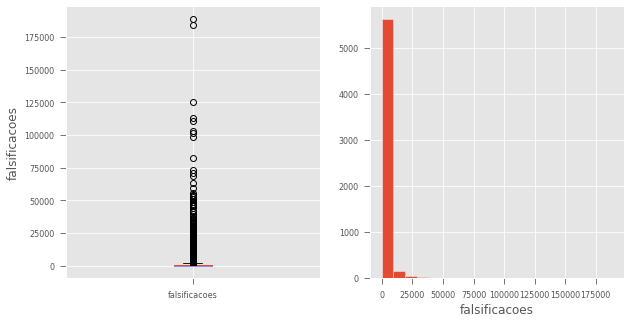

In [78]:
continious = ['ano', 'nota', 'falsificacoes']

for var in continious:
    #boxplot
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    fig = dados.boxplot(column = var)
    fig.set_ylabel(var)
    
    #histogram
    plt.subplot(1,2,2)
    fig = dados[var].hist(bins = 20)
    fig.set_xlabel(var)
    
    plt.show()

## Dados em conjunto de treino e conjunto de teste

In [7]:
from sklearn.model_selection import train_test_split

In [32]:


y = dados['falsificacoes']
x = dados.drop(['falsificacoes', "ano","estado", "familia"], axis = 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)
print(dados.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(5891, 5) (4123, 1) (1768, 1) (4123,) (1768,)


In [9]:
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (4123, 1)
Tamanho de X_test: (1768, 1)
Tamanho de y_train: (4123,)
Tamanho de y_test: (1768,)


## Estimador do scikit-learn de aprendizagem supervisionada regressor no conjunto de treino

In [10]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [11]:
clf.fit(X_train, y_train)

LinearRegression()

## Verifica o desempenho do estimador do scikit-learn no conjunto de teste

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = clf.predict(X_test)

print(f"Acurácia: ±{mean_absolute_error(y_test, y_pred):1.0f}")

Acurácia: ±6


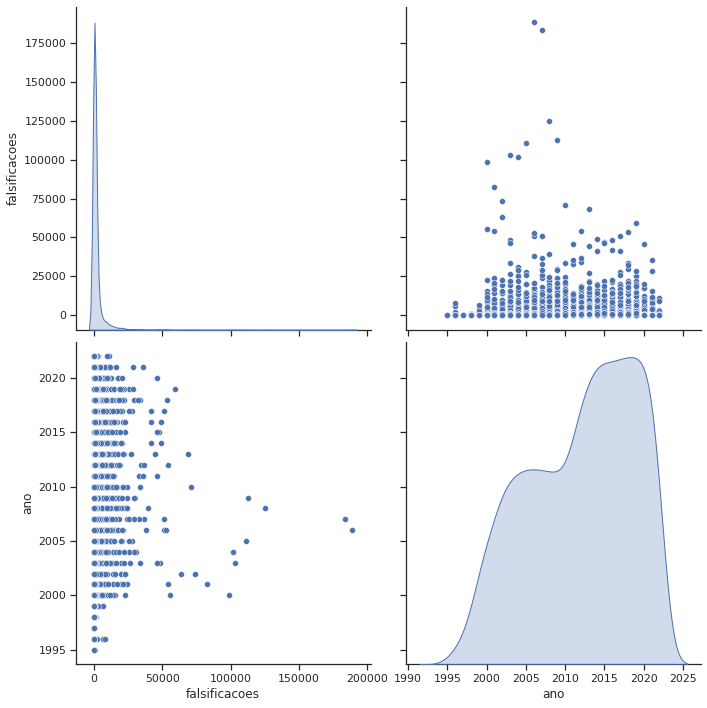

In [21]:
df = dados.drop(dados.loc[dados['falsificacoes']==0].index, inplace=True)
df = dados.drop(dados.loc[dados['ano']==9999].index, inplace=True)

pair_col1 = ['falsificacoes', 'ano']

sns.set_theme(style="ticks")

def pairplot(df, column_list):

    sns.pairplot(dados[column_list], kind='scatter', diag_kind='kde', 
                 height=5)
    plt.show()
    
pairplot(df, pair_col1)